#Introduction

the purpose of this notebook is to implement the preprocessing step in the Rebessi's thesis on Data quality and fairness!

In [109]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
from google.colab import drive
drive.mount('/content/drive')

# Load data directly from GitHub
data_url = 'https://raw.githubusercontent.com/Alireza-Tahmasebi/Ali-Tesina/main/data/previous-thesis-practice/adult.data'


# path to the training data set (raw data without column names)
#file_path = '/content/drive/My Drive/Tesi/adult/adult.data'

# column names (extracted from adult.names file)
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race",
    "sex", "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income"
]

# Function for checking the leading spaces in categorical columns! (it verifies the presence of leading spaces that is common in data sets!)
"""
def check_leading_spaces(df):
    for col in df.select_dtypes(include=["object"]):
        has_spaces = df[col].astype(str).str.startswith(" ")
        if has_spaces.any():
            print(f" Column '{col}' has values with leading spaces!")
        else:
            print(f" Column '{col}'has no leading spaces.")

check_leading_spaces(df)
"""


#Checking the trailing space! (it verifies that there is no sign of trailing space in each categorical columns of this data set!)
"""
def check_trailing_spaces(df):
    for col in df.select_dtypes(include=["object"]):
        has_spaces = df[col].astype(str).str.endswith(" ")
        if has_spaces.any():
            print(f" Column '{col}' has values with trailing spaces!")
        else:
            print(f" Column '{col}' has NO trailing space.")

check_trailing_spaces(df)
"""
#we take care of leading spaces here when we read the file
#also we need to conver the missing values from "?" to NaN
df = pd.read_csv(data_url, header=None, names=columns, na_values="?", skipinitialspace=True)

df.head(10)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


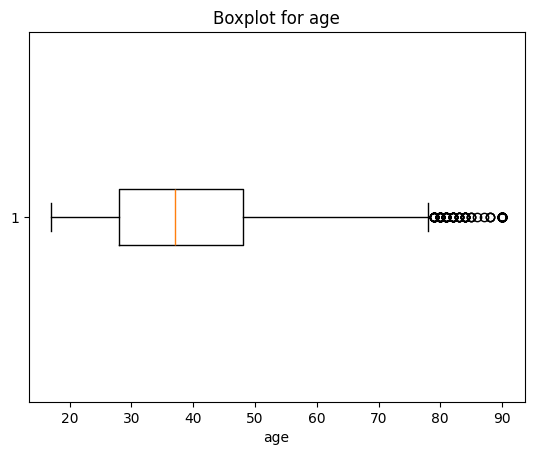

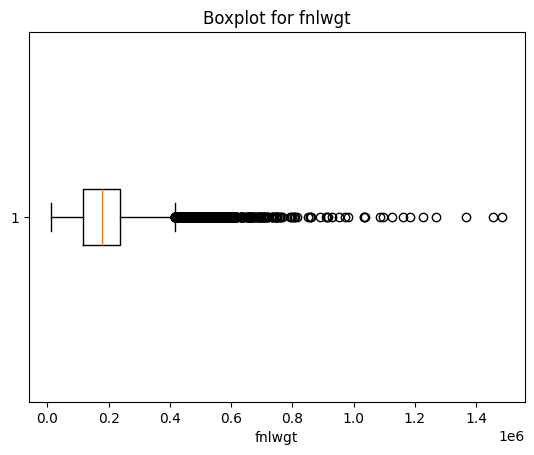

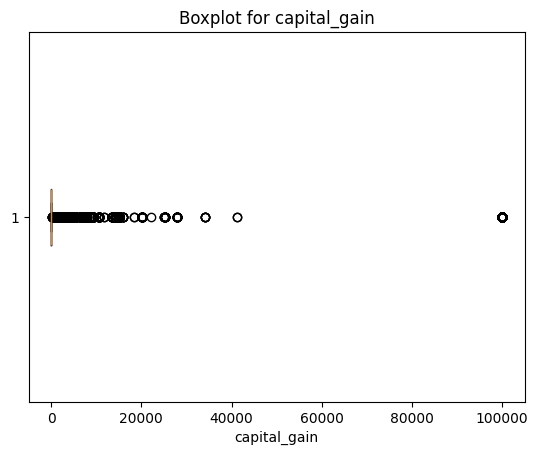

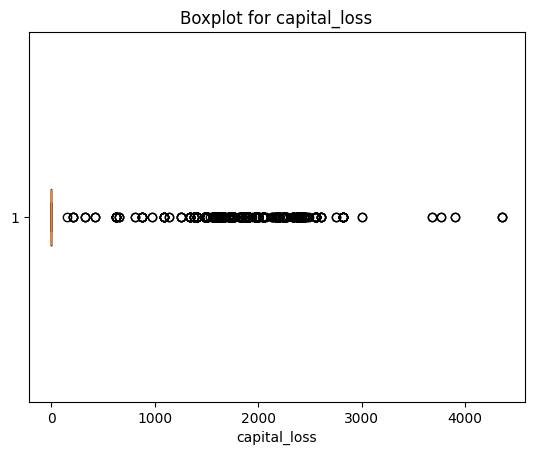

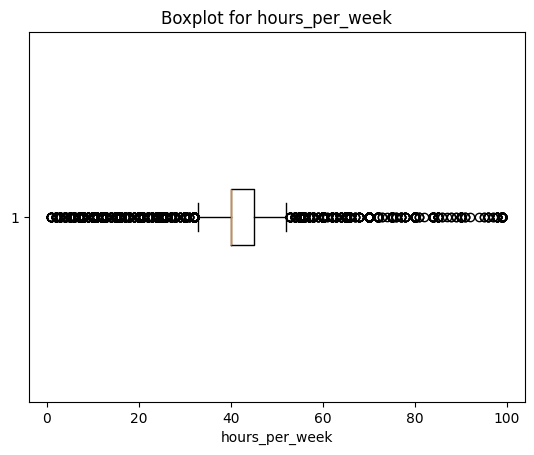

In [87]:
#Optional

# List of numeric columns to check for the existance of outliers
numeric_columns = ["age", "fnlwgt", "capital_gain", "capital_loss", "hours_per_week"]

# Plotting using boxplots for each numeric column! (also we could use violinplot as an alternative!)
for col in numeric_columns:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()
#but for the purpose of this preprocessing (rebessi's thesis), we will keep them! (we don't touch the outliers! for example age over 80 is quite natural and not due to error!)

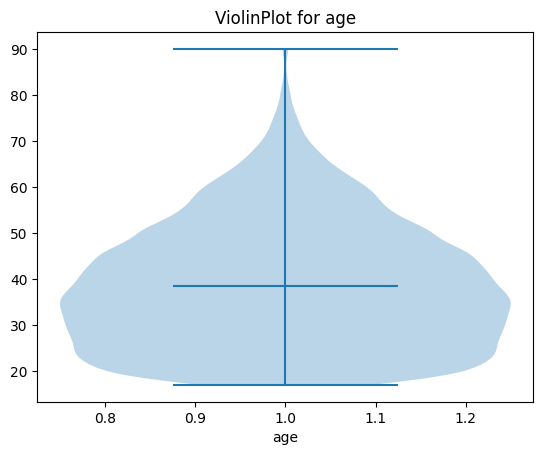

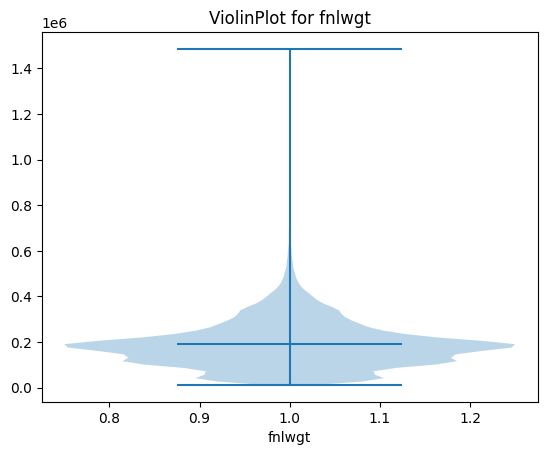

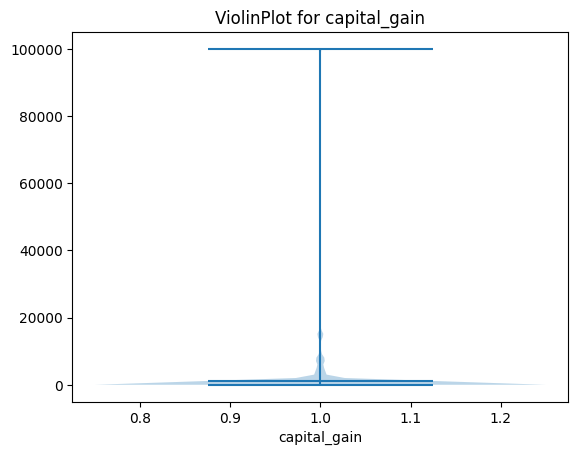

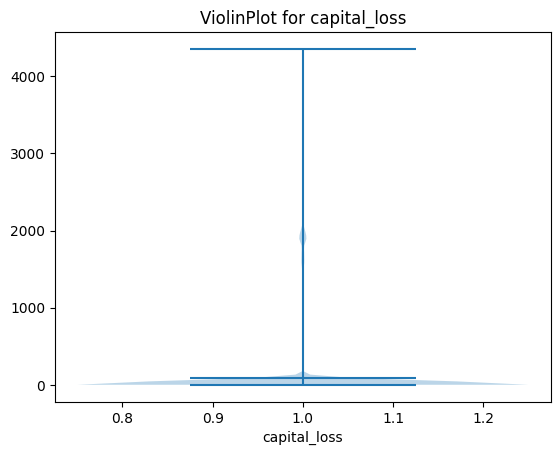

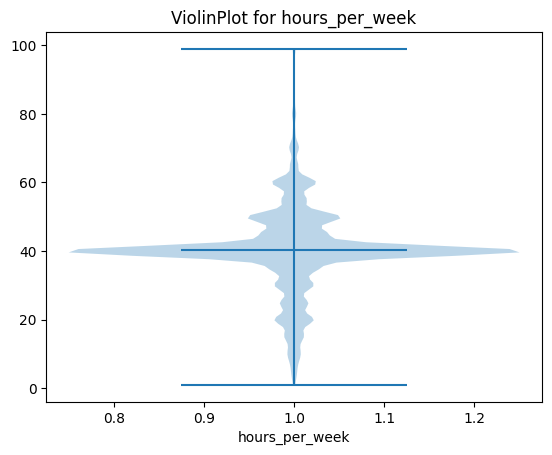

In [88]:
#Optional
#also violinplot could be useful
for col in numeric_columns:
    plt.figure()
    plt.violinplot(df[col].dropna(), showmeans=True)
    plt.title(f'ViolinPlot for {col}')
    plt.xlabel(col)
    plt.show()


In [89]:
#A quick check to see if any numeric attribute has a type of object, so we can fix it!
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [90]:
#a quick check on the number of rws and columns
rows, columns = df.shape
print(f"The DataFrame contains {rows} rows and {columns} columns")


The DataFrame contains 32561 rows and 15 columns


In [91]:
#check to see if there are some duplicated rows so we can remove them!
duplicates = df.duplicated().sum()

if duplicates > 0:
    print(f"Number of duplicated rows: {duplicates}")
    df.drop_duplicates(inplace=True)
    print("Duplicates have been removed successfully.")
else:
    print("No duplicated rows found!")

rows, columns = df.shape
print(f"The DataFrame contains {rows} rows and {columns} columns")

Number of duplicated rows: 24
Duplicates have been removed successfully.
The DataFrame contains 32537 rows and 15 columns


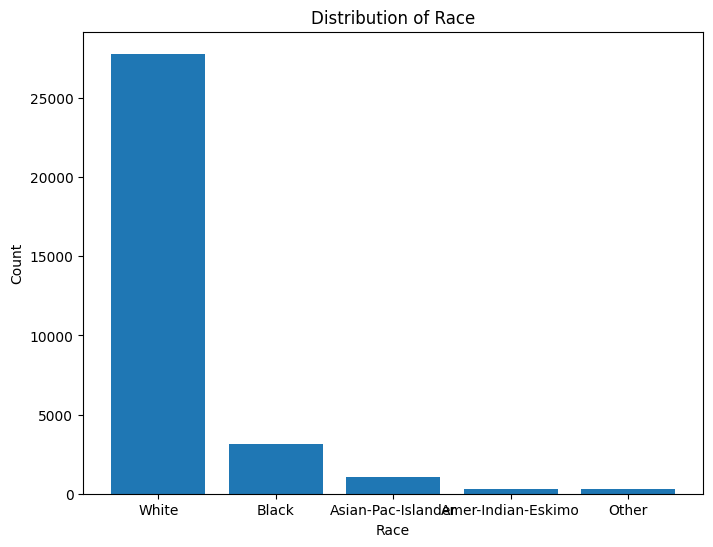

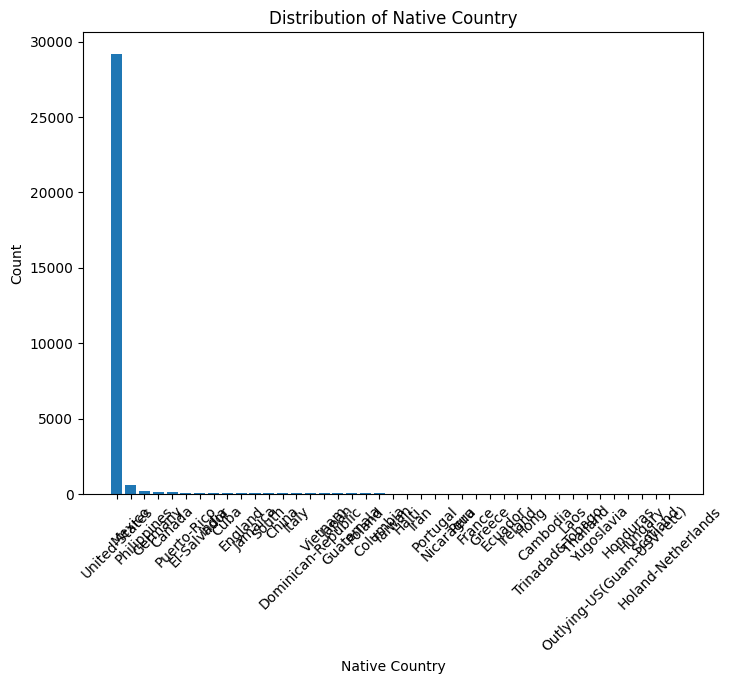

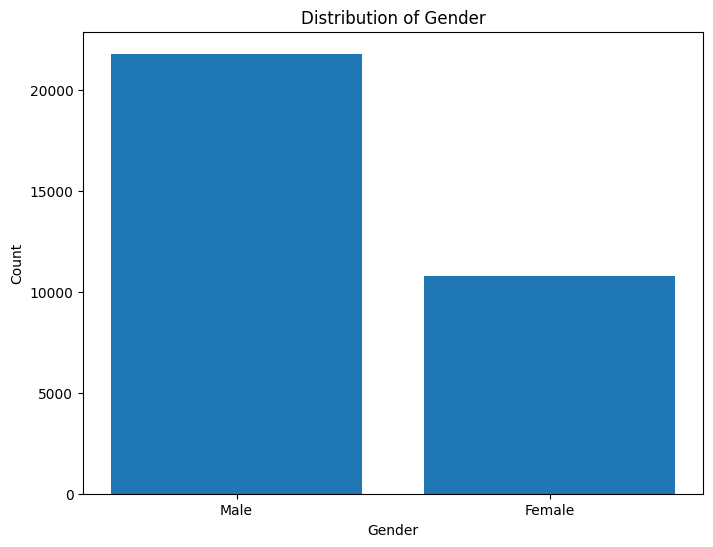

In [92]:
#Summary Statistic analysis (to better understand the dataset, and to start identifying possible errors and issues present in the dataset.)
#for numerical attributes
df.describe()
#for categorical attributes
df.describe(include=[object])


#let's plot them for better visualization!

# Distribution for "Race" column
race_counts = df['race'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(race_counts.index, race_counts.values)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.show()

# Distribution for "Native Country" column
native_counts = df['native_country'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(native_counts.index, native_counts.values)
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Distribution of Native Country')
plt.xticks(rotation=45)  #we rotate labels because there are many countries and there are long names!
plt.show()

# Distribution for "Gender" column
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


In [93]:
#missing ratio
missing_ratio_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Ratio Percentage:\n", missing_ratio_percentage)

Missing Ratio Percentage:
 age               0.000000
workclass         5.642807
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.664321
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.788733
income            0.000000
dtype: float64


In [94]:
#the attribute occupation is not necessary for our purpose so we drop it!
df.drop('occupation', axis=1, inplace=True)

In [95]:
# Check how many rows contain missing values
missing_rows_count = df.isnull().any(axis=1).sum()
print("Rows that contain missing values:", missing_rows_count)
#we have about 7% rows with missing values and we decide to remove them.
df_cleaned= df.dropna() #I would prefer to use inplace=True
print("End of cleaning phase! from now on, use df_cleaned dataframe!")

rows, columns = df_cleaned.shape
print(f"The DataFrame contains {rows} rows and {columns} columns")

Rows that contain missing values: 2391
End of cleaning phase! from now on, use df_cleaned dataframe!
The DataFrame contains 30146 rows and 14 columns


In [96]:
#feature selection
df_cleaned.drop(columns=['marital_status', 'relationship', 'capital_gain', 'capital_loss', 'education','fnlwgt'], inplace=True)
df_cleaned.shape
df_cleaned.head()

<ipython-input-96-85d6bb675cd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['marital_status', 'relationship', 'capital_gain', 'capital_loss', 'education','fnlwgt'], inplace=True)


,age,workclass,education_num,race,sex,hours_per_week,native_country,income
0,39,State-gov,13,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,White,Male,13,United-States,<=50K
2,38,Private,9,White,Male,40,United-States,<=50K
3,53,Private,7,Black,Male,40,United-States,<=50K
4,28,Private,13,Black,Female,40,Cuba,<=50K


<ipython-input-97-f3b7952be98e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


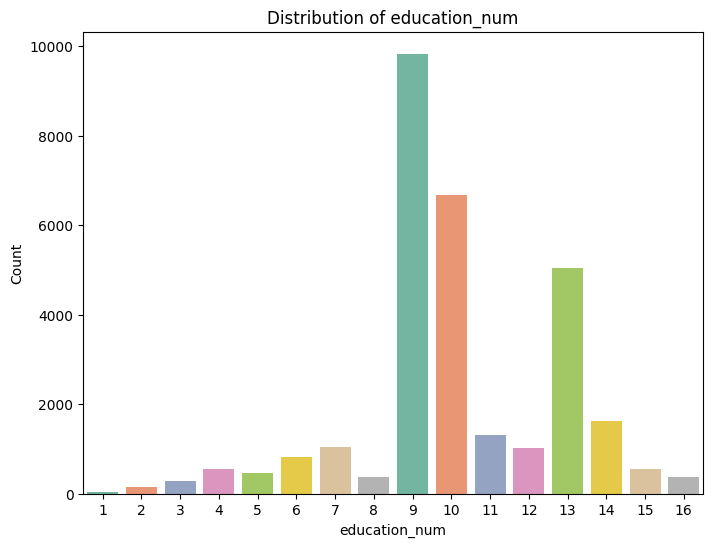

In [97]:

plt.figure(figsize=(8, 6))
sns.countplot(
    x='education_num',  # or y='education_num' for a horizontal bar chart as in the Thesis of signora Rebessi
    data=df_cleaned,
    palette='Set2',
   # hue='education_num'
)
plt.title("Distribution of education_num")
plt.xlabel("education_num")
plt.ylabel("Count")
plt.show()


<ipython-input-98-a22ff19d404a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['education_degree'] = pd.cut(


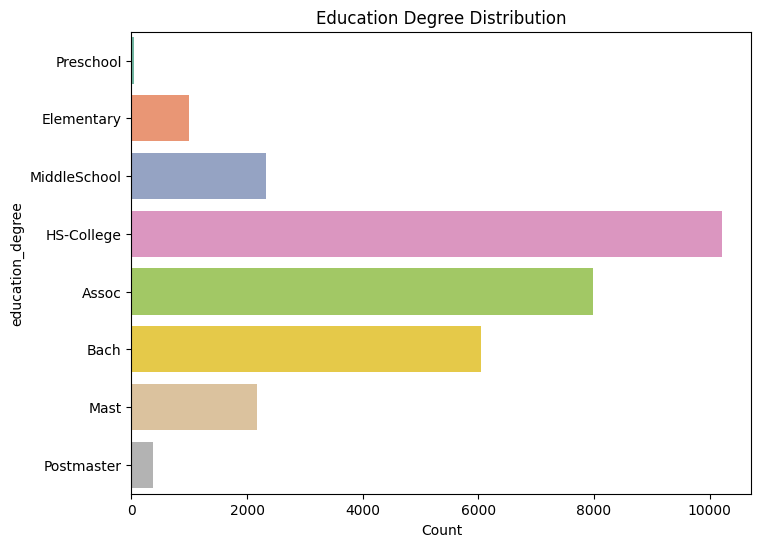

In [98]:

# Defining the bins and corresponding labels
bins = [1, 2, 5, 8, 10, 12, 14, 16, np.inf]
labels = [
    'Preschool',      # it covers education_num = 1
    'Elementary',     # it covers education_num in [2..4]
    'MiddleSchool',   # it covers education_num in [5..7]
    'HS-College',     # it covers education_num in [8..9]
    'Assoc',          # it covers education_num in [10..11]
    'Bach',           # it covers education_num in [12..13]
    'Mast',           # it covers education_num in [14..15]
    'Postmaster'      # it covers education_num >= 16
]

# Creating a new categorical column named 'education_degree'
df_cleaned['education_degree'] = pd.cut(
    df_cleaned['education_num'],
    bins=bins,
    labels=labels,
    right=False  # left-closed, right-open intervals
)


plt.figure(figsize=(8, 6))

# Ensuring the order matches the labels list so the bars appear in the correct order
sns.countplot(
    y='education_degree',
    data=df_cleaned,
    order=labels,       # the same order as label list
    palette='Set2',     # optional color palette
    hue = 'education_degree' #we use it to avoid getting the wawrning about palette deprecation with no hue!

)

plt.title("Education Degree Distribution")
plt.xlabel("Count")
plt.ylabel("education_degree")
plt.show()


In [99]:
#Discretization

#bins and labels for hours_per_week
hours_bins = [0, 20, 40, 60, 80, 100]
hours_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# here we create a new column 'hours_range' using pd.cut()
df_cleaned['hours_range'] = pd.cut(
    df_cleaned['hours_per_week'],
    bins=hours_bins,
    labels=hours_labels,
    include_lowest=True,  # including the leftmost edge
    right=True            # intervals will be left-inclusive, right-exclusive
)

# Droping the original 'hours_per_week' column
df_cleaned.drop('hours_per_week', axis=1, inplace=True)



#bins and labels for age
age_bins = [15, 30, 45, 60, 75, 90]
age_labels = ['15-30', '30-45', '45-60', '60-75', '75-90']

df_cleaned['age_range'] = pd.cut(
    df_cleaned['age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True,
    right=True
)

# Dropping the original 'age' column
df_cleaned.drop('age', axis=1, inplace=True)


df_cleaned[['hours_range', 'age_range']].head()

print("Hours Range Distribution:")
display(df_cleaned['hours_range'].value_counts())

print("\nAge Range Distribution:")
display(df_cleaned['age_range'].value_counts())


df_cleaned.drop('education_num', axis=1, inplace=True)
print("now the dataset is cleaned and we are left with the 8 selected features")

display(df_cleaned.head(10)) #in the actual work I will use display() for other intermediate expression,
#but here I mainly ran them using ctrl+shift+ enter (I ran selected portion of code to quickly check the results)
df_cleaned.shape

Hours Range Distribution:


<ipython-input-99-42e0e516894d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hours_range'] = pd.cut(
<ipython-input-99-42e0e516894d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('hours_per_week', axis=1, inplace=True)
<ipython-input-99-42e0e516894d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,count
hours_range,
21-40,18568
41-60,8140
0-20,2386
61-80,857
81-100,195



Age Range Distribution:


,count
age_range,
30-45,11821
15-30,9591
45-60,6929
60-75,1637
75-90,168


<IPython.core.display.Markdown object>


<ipython-input-99-42e0e516894d>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('education_num', axis=1, inplace=True)


,workclass,race,sex,native_country,income,education_degree,hours_range,age_range
0,State-gov,White,Male,United-States,<=50K,Bach,21-40,30-45
1,Self-emp-not-inc,White,Male,United-States,<=50K,Bach,0-20,45-60
2,Private,White,Male,United-States,<=50K,HS-College,21-40,30-45
3,Private,Black,Male,United-States,<=50K,MiddleSchool,21-40,45-60
4,Private,Black,Female,Cuba,<=50K,Bach,21-40,15-30
5,Private,White,Female,United-States,<=50K,Mast,21-40,30-45
6,Private,Black,Female,Jamaica,<=50K,MiddleSchool,0-20,45-60
7,Self-emp-not-inc,White,Male,United-States,>50K,HS-College,41-60,45-60
8,Private,White,Female,United-States,>50K,Mast,41-60,30-45
9,Private,White,Male,United-States,>50K,Bach,21-40,30-45


(30146, 8)